# Chapter 11 Exercise 8

Practice training a deep neural network on the CIFAR10 image dataset

### A. Build a DNN with 20 hidden layers of 100 neurons each (that's too many, but it's the point of this exercise). Use He initialization and the ELU activation function.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

plt.rcParams['figure.figsize'] = (12,6)

In [2]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for layer in range(20):
    model.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               307300    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               1

### B. Using Nadam optimization and early stopping, train the network on the CIFAR10 dataset
#### Remember to search for the right learning rate each time you change the model's architecture or hyper parameters.

In [5]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [6]:
X_train_full.shape

(50000, 32, 32, 3)

In [7]:
y_train_full.shape

(50000, 1)

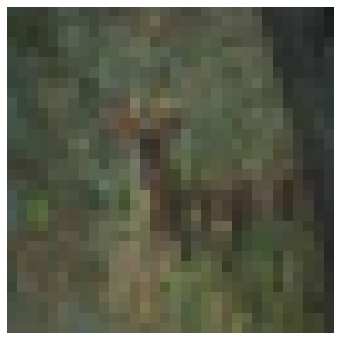

In [8]:
plt.imshow(X_train_full[10])
plt.axis('off')
plt.show()

In [9]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [10]:
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [11]:
nadam_opt = keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999)
check_pt = keras.callbacks.ModelCheckpoint("homl_11_model.h5",save_best_only=True)
early_stop = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

model.compile(loss='sparse_categorical_crossentropy', optimizer=nadam_opt, metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), callbacks=[check_pt, early_stop])

model = keras.models.load_model("homl_11_model.h5")

Epoch 1/20
1407/1407 [==============================] - 12s 9ms/step - loss: 2.0864 - accuracy: 0.2382 - val_loss: 1.9834 - val_accuracy: 0.2634
Epoch 2/20
1407/1407 [==============================] - 12s 9ms/step - loss: 1.8615 - accuracy: 0.3237 - val_loss: 1.8171 - val_accuracy: 0.3348
Epoch 3/20
1407/1407 [==============================] - 12s 9ms/step - loss: 1.7901 - accuracy: 0.3510 - val_loss: 1.8686 - val_accuracy: 0.3116
Epoch 4/20
1407/1407 [==============================] - 12s 9ms/step - loss: 1.7421 - accuracy: 0.3706 - val_loss: 1.8393 - val_accuracy: 0.3418
Epoch 5/20
1407/1407 [==============================] - 12s 9ms/step - loss: 1.7086 - accuracy: 0.3865 - val_loss: 1.7378 - val_accuracy: 0.3724
Epoch 6/20
1407/1407 [==============================] - 12s 9ms/step - loss: 1.6799 - accuracy: 0.4008 - val_loss: 1.7095 - val_accuracy: 0.3936
Epoch 7/20
1407/1407 [==============================] - 12s 9ms/step - loss: 1.6557 - accuracy: 0.4128 - val_loss: 1.6903 - val_ac

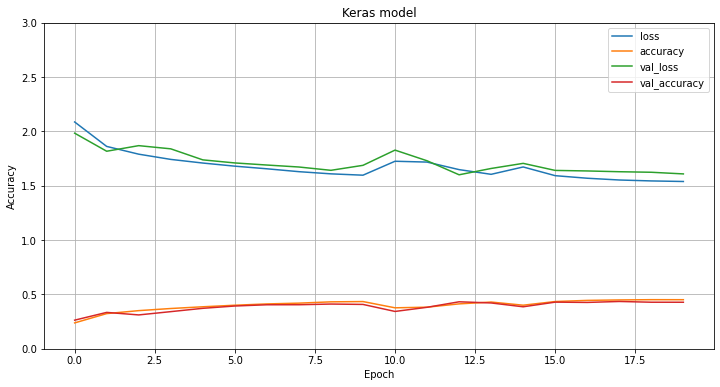

In [12]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0,3)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Keras model')
plt.show()

In [13]:
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 0s 1ms/step - loss: 1.6006 - accuracy: 0.1288


[1.600559115409851, 0.12880000472068787]

Known issue with TF for evaluate(). Use 'sparse_categorical_accurcacy'

### C. Now try adding batch normalization and compare the learning curves: Is is converging facter than before? Does it produce a better model? How does it affect traiing speed?

In [14]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for layer in range(20):
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, activation="softmax"))

In [15]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

from time import time
nadam_opt = keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999)
check_pt = keras.callbacks.ModelCheckpoint("homl_11_bn_model.h5",save_best_only=True)
early_stop = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

model.compile(loss='sparse_categorical_crossentropy', optimizer=nadam_opt, metrics=['sparse_categorical_accuracy'])

start=time()
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), callbacks=[check_pt, early_stop])
print(f'\nTraining time: {time()-start:0.1f} seconds')

Epoch 1/20
1407/1407 [==============================] - 18s 12ms/step - loss: 1.9072 - sparse_categorical_accuracy: 0.3171 - val_loss: 1.6986 - val_sparse_categorical_accuracy: 0.3952
Epoch 2/20
1407/1407 [==============================] - 17s 12ms/step - loss: 1.7196 - sparse_categorical_accuracy: 0.3875 - val_loss: 1.6422 - val_sparse_categorical_accuracy: 0.4072
Epoch 3/20
1407/1407 [==============================] - 18s 13ms/step - loss: 1.6475 - sparse_categorical_accuracy: 0.4139 - val_loss: 1.6039 - val_sparse_categorical_accuracy: 0.4278
Epoch 4/20
1407/1407 [==============================] - 19s 13ms/step - loss: 1.6006 - sparse_categorical_accuracy: 0.4326 - val_loss: 1.5624 - val_sparse_categorical_accuracy: 0.4512
Epoch 5/20
1407/1407 [==============================] - 19s 14ms/step - loss: 1.5566 - sparse_categorical_accuracy: 0.4464 - val_loss: 1.4916 - val_sparse_categorical_accuracy: 0.4712
Epoch 6/20
1407/1407 [==============================] - 17s 12ms/step - loss: 1.

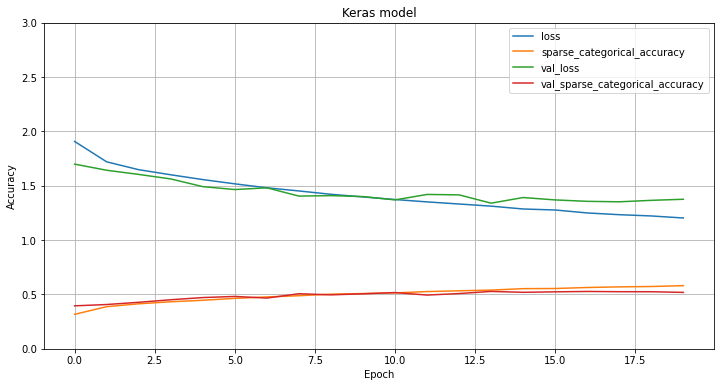

In [16]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0,3)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Keras model')
plt.show()

Converging faster, better model, not sure about training speed.

In [17]:
mod = keras.models.load_model("homl_11_bn_model.h5")
mod.evaluate(X_valid, y_valid)

157/157 [==============================] - 0s 2ms/step - loss: 1.3396 - sparse_categorical_accuracy: 0.5278


[1.3395516872406006, 0.5278000235557556]

### D. Now try replacing batch normalization with SELU and make the necessary adjutements to ensure the network self-normalizes (i.e., Standardize the input features, use LeCun normal initialization, make sure het DNN contains only a sequence of dense layers, etc.)

In [18]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [19]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for layer in range(20):
    model.add(keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [20]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["sparse_categorical_accuracy"])

In [21]:
# Scale data
means = X_train.mean(axis=0, keepdims=True)
stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - means) / stds
X_valid_scaled = (X_valid - means) / stds
X_test_scaled = (X_test - means) / stds

In [22]:
check_pt = keras.callbacks.ModelCheckpoint("homl_11_selu_model.h5",save_best_only=True)
early_stop = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

start = time()
history = model.fit(X_train_scaled, y_train, epochs = 20, validation_data = (X_valid_scaled, y_valid), callbacks = [check_pt, early_stop])
print("")
print(f'Time to train: {time()-start:0.1f} seconds')

Epoch 1/20
1407/1407 [==============================] - 4s 3ms/step - loss: 1.9018 - sparse_categorical_accuracy: 0.3192 - val_loss: 1.7471 - val_sparse_categorical_accuracy: 0.3694
Epoch 2/20
1407/1407 [==============================] - 4s 3ms/step - loss: 1.6883 - sparse_categorical_accuracy: 0.3987 - val_loss: 1.6678 - val_sparse_categorical_accuracy: 0.4038
Epoch 3/20
1407/1407 [==============================] - 4s 3ms/step - loss: 1.5993 - sparse_categorical_accuracy: 0.4292 - val_loss: 1.6252 - val_sparse_categorical_accuracy: 0.4142
Epoch 4/20
1407/1407 [==============================] - 4s 3ms/step - loss: 1.5393 - sparse_categorical_accuracy: 0.4529 - val_loss: 1.6059 - val_sparse_categorical_accuracy: 0.4234
Epoch 5/20
1407/1407 [==============================] - 4s 3ms/step - loss: 1.4903 - sparse_categorical_accuracy: 0.4686 - val_loss: 1.5691 - val_sparse_categorical_accuracy: 0.4356
Epoch 6/20
1407/1407 [==============================] - 4s 3ms/step - loss: 1.4470 - spars

In [23]:
mod = keras.models.load_model("homl_11_selu_model.h5")
mod.evaluate(X_valid_scaled, y_valid)

157/157 [==============================] - 0s 1ms/step - loss: 1.5304 - sparse_categorical_accuracy: 0.4542


[1.5304361581802368, 0.45419999957084656]

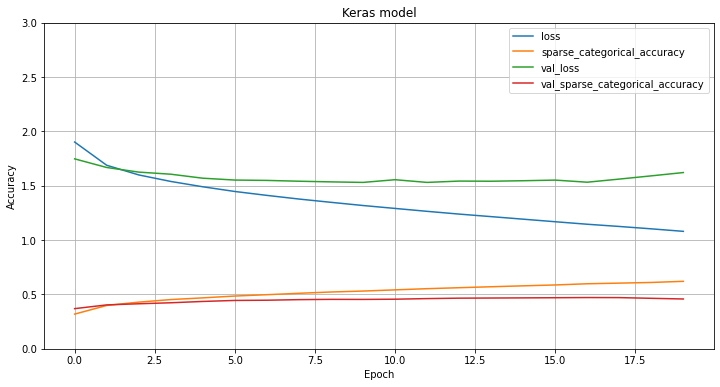

In [24]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0,3)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Keras model')
plt.show()

### E. Try regularizing the model with alpha dropout. Then without retraining your model, see if you can achieve better accuracy using MC Dropout

In [25]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [26]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))

for layer in range(20):
    model.add(keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))

model.add(keras.layers.AlphaDropout(rate=0.2))
model.add(keras.layers.Dense(10, activation="softmax"))

In [27]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["sparse_categorical_accuracy"])

start = time()
history = model.fit(X_train_scaled, y_train, epochs=20, validation_data=(X_valid_scaled, y_valid))
print(f'\nTotal training time: {time() - start:0.1f} seconds')

Epoch 1/20
1407/1407 [==============================] - 5s 3ms/step - loss: 2.0074 - sparse_categorical_accuracy: 0.2585 - val_loss: 1.9577 - val_sparse_categorical_accuracy: 0.3228
Epoch 2/20
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7969 - sparse_categorical_accuracy: 0.3428 - val_loss: 1.8760 - val_sparse_categorical_accuracy: 0.3288
Epoch 3/20
1407/1407 [==============================] - 5s 3ms/step - loss: 1.6982 - sparse_categorical_accuracy: 0.3933 - val_loss: 1.7949 - val_sparse_categorical_accuracy: 0.3758
Epoch 4/20
1407/1407 [==============================] - 5s 3ms/step - loss: 1.6339 - sparse_categorical_accuracy: 0.4231 - val_loss: 1.7635 - val_sparse_categorical_accuracy: 0.4070
Epoch 5/20
1407/1407 [==============================] - 5s 3ms/step - loss: 1.5764 - sparse_categorical_accuracy: 0.4458 - val_loss: 1.7470 - val_sparse_categorical_accuracy: 0.4294
Epoch 6/20
1407/1407 [==============================] - 5s 3ms/step - loss: 1.5350 - spars

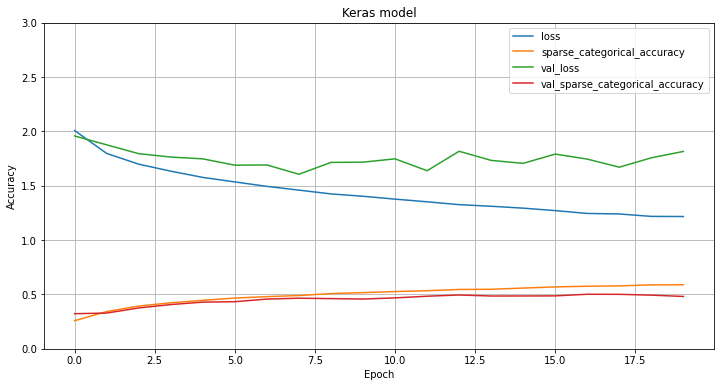

In [28]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0,3)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Keras model')
plt.show()

In [29]:
model.evaluate(X_valid_scaled, y_valid)

157/157 [==============================] - 0s 1ms/step - loss: 1.8152 - sparse_categorical_accuracy: 0.4814


[1.8152281045913696, 0.4814000129699707]

#### MC Dropout

In [30]:
class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [31]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer for layer in model.layers
])

In [32]:
def mc_dropout_predict_probas(mc_model, X, n_samples=10):
    y_probas = [mc_model.predict(X) for sample in range(n_samples)]
    return np.mean(y_probas, axis=0)

def mc_dropout_predict_classes(mc_model, X, n_samples=10):
    y_probas = mc_dropout_predict_probas(mc_model, X, n_samples)
    return np.argmax(y_probas, axis=1)

In [33]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

y_pred = mc_dropout_predict_classes(mc_model, X_valid_scaled)
accuracy = np.mean(y_pred == y_valid[:,0])
accuracy

0.4792

Not better than regular AlphaDropout

### F. Retrain your model using 1cycle scheduling and see if it improves training spped and model accuracy

In [40]:
import math
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.lr)
    K.set_value(model.optimizer.lr, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.lr, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

In [41]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32,32,3]))
for layer in range(20):
    model.add(keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'))

model.add(keras.layers.AlphaDropout(rate=0.2))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["sparse_categorical_accuracy"])

352/352 [==============================] - 2s 6ms/step - loss: nan - sparse_categorical_accuracy: 0.1409


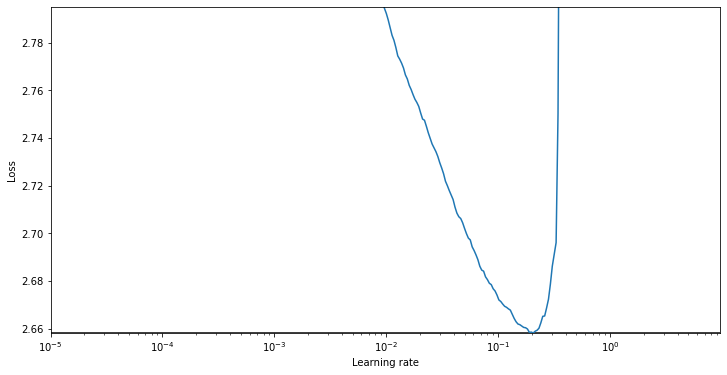

In [42]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [43]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate)

In [48]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32,32,3]))
for layer in range(20):
    model.add(keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'))

model.add(keras.layers.AlphaDropout(rate=0.2))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["sparse_categorical_accuracy"])

In [49]:
n_epochs = 10
onecycle = OneCycleScheduler(math.ceil(len(X_train_scaled) / batch_size) * n_epochs, max_rate=0.05)
start = time()
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

print(f'\nTraining time: {time() - start:0.1f} seconds')

Epoch 1/10
352/352 [==============================] - 2s 7ms/step - loss: 2.1210 - sparse_categorical_accuracy: 0.2734 - val_loss: 1.8329 - val_sparse_categorical_accuracy: 0.3722
Epoch 2/10
352/352 [==============================] - 2s 6ms/step - loss: 1.7517 - sparse_categorical_accuracy: 0.3798 - val_loss: 1.6552 - val_sparse_categorical_accuracy: 0.4176
Epoch 3/10
352/352 [==============================] - 2s 7ms/step - loss: 1.6183 - sparse_categorical_accuracy: 0.4268 - val_loss: 1.6713 - val_sparse_categorical_accuracy: 0.4396
Epoch 4/10
352/352 [==============================] - 2s 7ms/step - loss: 1.5521 - sparse_categorical_accuracy: 0.4524 - val_loss: 1.8564 - val_sparse_categorical_accuracy: 0.4112
Epoch 5/10
352/352 [==============================] - 2s 7ms/step - loss: 1.5002 - sparse_categorical_accuracy: 0.4700 - val_loss: 1.6380 - val_sparse_categorical_accuracy: 0.4620
Epoch 6/10
352/352 [==============================] - 2s 6ms/step - loss: 1.4047 - sparse_categorica

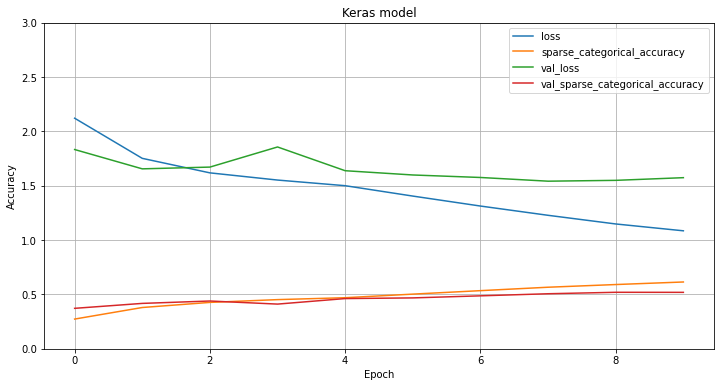

In [50]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0,3)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Keras model')
plt.show()

In [51]:
model.evaluate(X_valid_scaled, y_valid)

157/157 [==============================] - 0s 1ms/step - loss: 1.5740 - sparse_categorical_accuracy: 0.5192


[1.5740262269973755, 0.5192000269889832]

Training time took only 25 seconds. Accuracy better than most except for Batch Normalizatin, which took over 12 times as long.